# Sales Analysis

##  Generating Synthetic Dataset

Leveraging data cleaning and programming in Python, the below represents creating a synthetic dataset for analysis as a sample Sales EDA for an e-commerce company. Key features generated include location (by state & region), season, promotions applied, and random customer data / order values.  

In [1]:
# Importing packages (also available via the requirements.txt file in the main branch)

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

In [2]:
# Load the 500 random names stored in directory CSV file to customer dataframe.

customer = pd.read_csv('randomnames.csv')
customer

,"First, Last Name"
0,Judith Compton
1,Mamie Black
2,Jewel Russell
3,Jeanine Waller
4,Lilia Holland
...,...
495,Pierre Hickman
496,Dave Roberson
497,Susan Watts
498,Ezekiel White


In [3]:
# Split First and Last Name columns for usability. 

customer[['First Name','Last Name']] = customer['First, Last Name'].str.split(' ',expand=True)
customer

,"First, Last Name",First Name,Last Name
0,Judith Compton,Judith,Compton
1,Mamie Black,Mamie,Black
2,Jewel Russell,Jewel,Russell
3,Jeanine Waller,Jeanine,Waller
4,Lilia Holland,Lilia,Holland
...,...,...,...
495,Pierre Hickman,Pierre,Hickman
496,Dave Roberson,Dave,Roberson
497,Susan Watts,Susan,Watts
498,Ezekiel White,Ezekiel,White


In [4]:
# Generate random purchase values using numpy range. 

customer['Purchase_Amount'] = np.random.randint(0,5000, size=len(customer))
customer

,"First, Last Name",First Name,Last Name,Purchase_Amount
0,Judith Compton,Judith,Compton,4895
1,Mamie Black,Mamie,Black,690
2,Jewel Russell,Jewel,Russell,1629
3,Jeanine Waller,Jeanine,Waller,3487
4,Lilia Holland,Lilia,Holland,2430
...,...,...,...,...
495,Pierre Hickman,Pierre,Hickman,943
496,Dave Roberson,Dave,Roberson,2716
497,Susan Watts,Susan,Watts,2348
498,Ezekiel White,Ezekiel,White,1969


In [5]:
# Generate purchase locations (at state level) using list of states. 
# Note, this list includes 50+ states, including District of Columbia, Puerto Rico, etc.

states = ["Alabama", "Alaska", "American Samoa", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia", "Guam", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Minor Outlying Islands", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Northern Mariana Islands", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "U.S. Virgin Islands", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

rng = np.random.default_rng()
customer['State'] = rng.choice(states, len(customer))
customer['State']

0           Maine
1           Texas
2      New Jersey
3       Minnesota
4         Indiana
          ...    
495    New Mexico
496        Hawaii
497    New Mexico
498       Indiana
499       Florida
Name: State, Length: 500, dtype: object

In [6]:
customer

,"First, Last Name",First Name,Last Name,Purchase_Amount,State
0,Judith Compton,Judith,Compton,4895,Maine
1,Mamie Black,Mamie,Black,690,Texas
2,Jewel Russell,Jewel,Russell,1629,New Jersey
3,Jeanine Waller,Jeanine,Waller,3487,Minnesota
4,Lilia Holland,Lilia,Holland,2430,Indiana
...,...,...,...,...,...
495,Pierre Hickman,Pierre,Hickman,943,New Mexico
496,Dave Roberson,Dave,Roberson,2716,Hawaii
497,Susan Watts,Susan,Watts,2348,New Mexico
498,Ezekiel White,Ezekiel,White,1969,Indiana


In [7]:
#Create regions based on each state for grouping in visualizations. 

regions = {
'New England' : ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
'Middle Atlantic' : ['Delaware', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
'South' : ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia'],
'Midwest' : ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
'Southwest' : ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
'West' : ['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming']
}

In [8]:
# Create new column using the mapped values. 

region_map = {k: v for v, lst in regions.items() for k in lst}
customer['Region'] = customer['State'].map(region_map)

In [9]:
customer

,"First, Last Name",First Name,Last Name,Purchase_Amount,State,Region
0,Judith Compton,Judith,Compton,4895,Maine,New England
1,Mamie Black,Mamie,Black,690,Texas,Southwest
2,Jewel Russell,Jewel,Russell,1629,New Jersey,Middle Atlantic
3,Jeanine Waller,Jeanine,Waller,3487,Minnesota,Midwest
4,Lilia Holland,Lilia,Holland,2430,Indiana,Midwest
...,...,...,...,...,...,...
495,Pierre Hickman,Pierre,Hickman,943,New Mexico,Southwest
496,Dave Roberson,Dave,Roberson,2716,Hawaii,West
497,Susan Watts,Susan,Watts,2348,New Mexico,Southwest
498,Ezekiel White,Ezekiel,White,1969,Indiana,Midwest


In [10]:
# It looks like there are nulls, check for these values. 

customer['Region'].unique()

array(['New England', 'Southwest', 'Middle Atlantic', 'Midwest', 'West',
       nan, 'South'], dtype=object)

In [11]:
#Fill na to remove null values. 

customer['Region'] = customer['Region'].fillna('Other')

In [12]:
customer

,"First, Last Name",First Name,Last Name,Purchase_Amount,State,Region
0,Judith Compton,Judith,Compton,4895,Maine,New England
1,Mamie Black,Mamie,Black,690,Texas,Southwest
2,Jewel Russell,Jewel,Russell,1629,New Jersey,Middle Atlantic
3,Jeanine Waller,Jeanine,Waller,3487,Minnesota,Midwest
4,Lilia Holland,Lilia,Holland,2430,Indiana,Midwest
...,...,...,...,...,...,...
495,Pierre Hickman,Pierre,Hickman,943,New Mexico,Southwest
496,Dave Roberson,Dave,Roberson,2716,Hawaii,West
497,Susan Watts,Susan,Watts,2348,New Mexico,Southwest
498,Ezekiel White,Ezekiel,White,1969,Indiana,Midwest


In [13]:
# Add Season to show potential sales / promotions that occur based on time. 
# Generate purchase locations (at state level) using list of states. 

season = ["Fall", "Winter", "Spring", "Summer"]

rng = np.random.default_rng()
customer['Season'] = rng.choice(season, len(customer))
customer['Season']

0      Summer
1      Winter
2      Spring
3      Winter
4      Summer
        ...  
495    Spring
496    Winter
497      Fall
498    Summer
499      Fall
Name: Season, Length: 500, dtype: object

In [14]:
# Add whether a promotion was applied to the values, obviously this would typically be a more complicated process, but providing as a way to introduce an additional filter for visualization efforts in a simplified fashion. 

promotion = ["Non-Holiday Discount", "Holiday Discount", "None"]

rng = np.random.default_rng()
customer['Promotion'] = rng.choice(promotion, len(customer))
customer['Promotion']

0      Non-Holiday Discount
1          Holiday Discount
2      Non-Holiday Discount
3                      None
4                      None
               ...         
495                    None
496                    None
497                    None
498    Non-Holiday Discount
499                    None
Name: Promotion, Length: 500, dtype: object

In [15]:
# Review the finalized dataframe and send to csv to lock randomized values

customer

,"First, Last Name",First Name,Last Name,Purchase_Amount,State,Region,Season,Promotion
0,Judith Compton,Judith,Compton,4895,Maine,New England,Summer,Non-Holiday Discount
1,Mamie Black,Mamie,Black,690,Texas,Southwest,Winter,Holiday Discount
2,Jewel Russell,Jewel,Russell,1629,New Jersey,Middle Atlantic,Spring,Non-Holiday Discount
3,Jeanine Waller,Jeanine,Waller,3487,Minnesota,Midwest,Winter,None
4,Lilia Holland,Lilia,Holland,2430,Indiana,Midwest,Summer,None
...,...,...,...,...,...,...,...,...
495,Pierre Hickman,Pierre,Hickman,943,New Mexico,Southwest,Spring,None
496,Dave Roberson,Dave,Roberson,2716,Hawaii,West,Winter,None
497,Susan Watts,Susan,Watts,2348,New Mexico,Southwest,Fall,None
498,Ezekiel White,Ezekiel,White,1969,Indiana,Midwest,Summer,Non-Holiday Discount


In [16]:
# send to csv for tableau visualization

customer.to_csv('generatedcustomers.csv', index=False)

### Analyzing Dataframe Shape

In [100]:
#Analyzing dataframe size / shape for insight. 

customer.shape

(500, 8)

In [101]:
# The dataframe consists of 3 string features, 1 integer, and 4 categorical features

customer.dtypes

First, Last Name    object
First Name          object
Last Name           object
Purchase_Amount      int32
State               object
Region              object
Season              object
Promotion           object
dtype: object

### Initial Exploratory Data Analysis of the Results

Using python for quick analysis of the dataset and to uncover key insights / reccomendations in addition to the Tableau Dashboard / Data Story that can be presented to stakeholders. The EDA seeks to validate initial assumptions and provide deep dive into key statistics that can inform the recommendations. 

In [22]:
# Using describe reflects the Mean, Min, Max, 20th percentile, and 80th percentile purchases

# From the analysis, the top 20% of customers purchase almost 4x the bottom 20th percentile.

customer.describe(percentiles=[.2,.8])

,Purchase_Amount
count,500.00000
mean,2500.28600
std,1400.10231
min,9.00000
20%,1082.00000
50%,2422.50000
80%,3950.40000
max,4992.00000


In [27]:
# What is the total purchase amount? 

total = customer['Purchase_Amount'].sum()
total

1250143

In [29]:
# Analyze the distribution by season and visualize

season = customer.groupby('Season')['Purchase_Amount'].sum()
season

Season
Fall      334831
Spring    274312
Summer    311458
Winter    329542
Name: Purchase_Amount, dtype: int32

In [35]:
# Analyze by State and visualize, focusing on top 20th percentile of States

states = customer.groupby('State')['Purchase_Amount'].sum()
states = states.sort_values(ascending=False)
states

<bound method NDFrame.describe of State
Alaska                      38615
Wisconsin                   37191
Oregon                      36825
South Dakota                34366
Louisiana                   33718
Idaho                       33350
South Carolina              32580
Illinois                    31464
Tennessee                   30216
U.S. Virgin Islands         30075
Montana                     29810
Vermont                     28407
Mississippi                 28178
Hawaii                      26544
Guam                        25587
New Mexico                  25154
Minnesota                   25109
Colorado                    24952
Rhode Island                24679
Wyoming                     24398
Nebraska                    23646
Maine                       23303
New Jersey                  22707
Missouri                    22601
New Hampshire               22208
Michigan                    21967
Washington                  21823
Iowa                        21317
Ohio    

In [38]:
# Validating the results, includes 7 commonwealths (DC, Puerto Rico, etc.)

states.shape

(57,)

In [39]:
# Understand Pareto .2 and .8 percentiles of purchases
states.describe(percentiles=[.2,.5,.8])

count       57.000000
mean     21932.333333
std       7445.219152
min       6890.000000
20%      16462.800000
50%      21145.000000
80%      28361.200000
max      38615.000000
Name: Purchase_Amount, dtype: float64

In [42]:
# Interested in top 20% of Sales by State

n = 20
statestop20 = states.head(int(len(states)*(n/100)))
statestop20

State
Alaska                 38615
Wisconsin              37191
Oregon                 36825
South Dakota           34366
Louisiana              33718
Idaho                  33350
South Carolina         32580
Illinois               31464
Tennessee              30216
U.S. Virgin Islands    30075
Montana                29810
Name: Purchase_Amount, dtype: int32

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

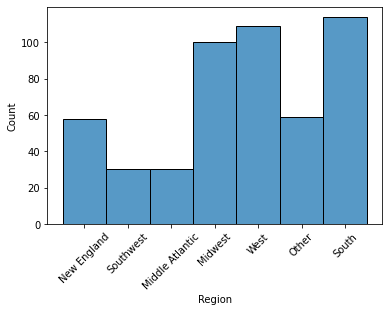

In [64]:
sns.histplot(data=customer, x='Region')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Season', ylabel='Count'>

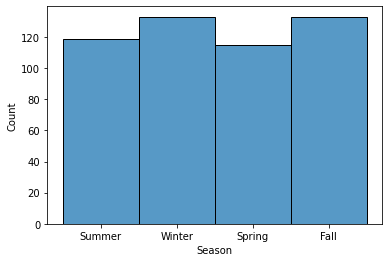

In [50]:
sns.histplot(data=customer, x='Season')

<AxesSubplot:xlabel='Promotion', ylabel='Count'>

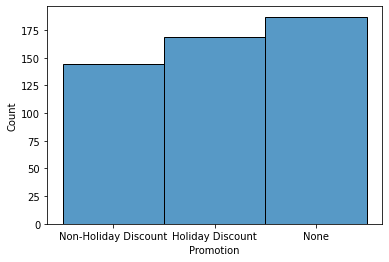

In [51]:
sns.histplot(data=customer, x='Promotion')

In [53]:
# Create top 20th percentile of customers

customersorted = customer.sort_values(['Purchase_Amount'], ascending=False)
customersorted

,"First, Last Name",First Name,Last Name,Purchase_Amount,State,Region,Season,Promotion
225,Vera Mcguire,Vera,Mcguire,4992,Texas,Southwest,Winter,None
484,Wilber Moore,Wilber,Moore,4987,Wyoming,West,Fall,Holiday Discount
309,Selena Sims,Selena,Sims,4971,Oregon,West,Spring,Holiday Discount
155,Stephan Lamb,Stephan,Lamb,4952,New Jersey,Middle Atlantic,Fall,None
209,Elijah Pierce,Elijah,Pierce,4938,California,West,Winter,None
...,...,...,...,...,...,...,...,...
279,Marylou Martin,Marylou,Martin,44,Indiana,Midwest,Fall,None
384,Donald Turner,Donald,Turner,39,Virginia,South,Winter,Non-Holiday Discount
67,Carson Thomas,Carson,Thomas,37,Montana,West,Spring,None
404,Peggy Martinez,Peggy,Martinez,10,South Carolina,South,Winter,Non-Holiday Discount


In [54]:
# Creating top 20% of customers

n = 20
customertop20 = customersorted.head(int(len(customersorted)*(n/100)))
customertop20

,"First, Last Name",First Name,Last Name,Purchase_Amount,State,Region,Season,Promotion
225,Vera Mcguire,Vera,Mcguire,4992,Texas,Southwest,Winter,None
484,Wilber Moore,Wilber,Moore,4987,Wyoming,West,Fall,Holiday Discount
309,Selena Sims,Selena,Sims,4971,Oregon,West,Spring,Holiday Discount
155,Stephan Lamb,Stephan,Lamb,4952,New Jersey,Middle Atlantic,Fall,None
209,Elijah Pierce,Elijah,Pierce,4938,California,West,Winter,None
...,...,...,...,...,...,...,...,...
466,Haley Jennings,Haley,Jennings,3987,Mississippi,South,Fall,Holiday Discount
15,Erica Powell,Erica,Powell,3982,Delaware,Middle Atlantic,Winter,None
337,Yesenia Adkins,Yesenia,Adkins,3962,Missouri,South,Spring,None
146,Sammie Ferrell,Sammie,Ferrell,3957,Arizona,Southwest,Spring,None


In [56]:
# The top 20% of customers averaged 4,453 in order value (per customer)

customertop20['Purchase_Amount'].mean()

4453.68

In [58]:
# The top 20% of states averaged 33,473 average customer order (per state)

statestop20.mean()

33473.63636363636

In [62]:
customer['Season'].value_counts()

Winter    133
Fall      133
Summer    119
Spring    115
Name: Season, dtype: int64

In [66]:
# Percentages by each feature to see distribution

promotion = customer.groupby(['Promotion'])['Purchase_Amount'].sum()

In [67]:
promotion

Promotion
Holiday Discount        414667
Non-Holiday Discount    345771
None                    489705
Name: Purchase_Amount, dtype: int32

In [68]:
promotion.columns = ['Promotion','Purchases']
promotion

Promotion
Holiday Discount        414667
Non-Holiday Discount    345771
None                    489705
Name: Purchase_Amount, dtype: int32

In [70]:
promotion = pd.DataFrame(data=promotion)

In [71]:
promotion

,Purchase_Amount
Promotion,
Holiday Discount,414667
Non-Holiday Discount,345771
None,489705


In [72]:
promotion['percent'] = promotion['Purchase_Amount'] / promotion['Purchase_Amount'].sum()

In [73]:
promotion

,Purchase_Amount,percent
Promotion,,
Holiday Discount,414667,0.331696
Non-Holiday Discount,345771,0.276585
None,489705,0.391719


In [74]:
# Based on the analysis percent is fairly even across categories

In [75]:
# Doing the same for Region

region = pd.DataFrame(customer.groupby(['Region'])['Purchase_Amount'].sum())

In [76]:
region

,Purchase_Amount
Region,
Middle Atlantic,87739
Midwest,257667
New England,130645
Other,141630
South,270254
Southwest,81369
West,280839


In [77]:
region['percent'] = region['Purchase_Amount'] / region['Purchase_Amount'].sum()

In [78]:
region

,Purchase_Amount,percent
Region,,
Middle Atlantic,87739,0.070183
Midwest,257667,0.206110
New England,130645,0.104504
Other,141630,0.113291
South,270254,0.216178
Southwest,81369,0.065088
West,280839,0.224646


In [82]:
regionsorted = region.sort_values('percent', ascending=False)

In [83]:
regionsorted

,Purchase_Amount,percent
Region,,
West,280839,0.224646
South,270254,0.216178
Midwest,257667,0.206110
Other,141630,0.113291
New England,130645,0.104504
Middle Atlantic,87739,0.070183
Southwest,81369,0.065088


In [84]:
# The West, South & Midwest have a disproportionate amount of sales representing 60%, compared to the other regions representing the remaining 40%. 

In [85]:
# Doing the same by season

season = pd.DataFrame(customer.groupby(['Season'])['Purchase_Amount'].sum())

In [86]:
season

,Purchase_Amount
Season,
Fall,334831
Spring,274312
Summer,311458
Winter,329542


In [87]:
season['percent'] = season['Purchase_Amount'] / season['Purchase_Amount'].sum()

In [88]:
season

,Purchase_Amount,percent
Season,,
Fall,334831,0.267834
Spring,274312,0.219424
Summer,311458,0.249138
Winter,329542,0.263603


In [89]:
season.sort_values('percent', ascending=False)
season

,Purchase_Amount,percent
Season,,
Fall,334831,0.267834
Spring,274312,0.219424
Summer,311458,0.249138
Winter,329542,0.263603


In [105]:
customertop20states = customertop20.groupby(['State'])['Purchase_Amount'].sum()
customertop20states = customertop20states.sort_values(ascending=False)

In [106]:
customertop20states

State
Wisconsin                 26271
Illinois                  22294
Alaska                    21787
South Dakota              19236
Oregon                    18344
Louisiana                 17800
Wyoming                   14155
Tennessee                 13789
Idaho                     13374
Oklahoma                  13336
Arizona                   13152
Nebraska                  12708
New Jersey                 9787
Maine                      9691
U.S. Virgin Islands        9250
Florida                    9206
Virginia                   9162
California                 9108
Michigan                   8927
South Carolina             8880
Kansas                     8864
Vermont                    8853
Connecticut                8827
Hawaii                     8708
Rhode Island               8616
New Mexico                 8461
Mississippi                8308
Delaware                   8164
Nevada                     8144
New York                   8091
Missouri                   8071
Te

In [109]:
customercounts = customer.groupby(['State'])['First, Last Name'].nunique()

In [110]:
customercounts = customercounts.sort_values(ascending=False)

In [117]:
customercounts = pd.DataFrame(customercounts)

In [124]:
customerclean = customer.groupby('State').agg({
        'Purchase_Amount': 'sum',
        'First, Last Name': 'nunique'
        })

In [125]:
customerclean

,Purchase_Amount,"First, Last Name"
State,,
Alabama,17137,7
Alaska,38615,15
American Samoa,20166,9
Arizona,20363,6
Arkansas,12143,7
California,16667,5
Colorado,24952,10
Connecticut,18024,7
Delaware,11949,4


In [127]:
customerclean = customerclean.sort_values('Purchase_Amount', ascending=False)

In [128]:
# All of the top 12 values have more than 10 customers per state, which means there aren't outliers with let's say <5 customers in any state representing eneven distribution. 

customerclean

,Purchase_Amount,"First, Last Name"
State,,
Alaska,38615,15
Wisconsin,37191,11
Oregon,36825,13
South Dakota,34366,11
Louisiana,33718,12
Idaho,33350,11
South Carolina,32580,14
Illinois,31464,10
Tennessee,30216,10


Based on these findings, it would be reasonable to run tests to allocate a higher proportion of advertising budgets towards the top states and customers to understand if regional differences can produce higher advertising ROI vs. other regions. 